In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import KFold, RepeatedKFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.preprocessing import LabelBinarizer
from collections import Counter
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler

In [2]:
def ECFP4(smiles):
    target=[]
    for smile in smiles:
        c=Chem.MolFromSmiles(smile)
        fp=AllChem.GetMorganFingerprintAsBitVect(c, 2, 1024)
        fp=fp.ToBitString()
        target.append(fp)
#     print(len(target))
    df7=pd.DataFrame()
    df7['target']=target
    for i in range(len(target[0])):
        df7['B'+str(i)]=df7['target'].str[i]
    df7=df7.drop('target', axis=1)
    for cols in df7.columns:
        df7[cols]=np.int64(df7[cols])
    return df7

In [3]:
def MACCS(smiles):
    target=[]
    for smile in smiles:
        c=Chem.MolFromSmiles(smile)
        fp=AllChem.GetMACCSKeysFingerprint(c)
        fp=fp.ToBitString()
        target.append(fp)
#     print(len(target))
    df7=pd.DataFrame()
    df7['target']=target
    for i in range(len(target[0])):
        df7['B'+str(i)]=df7['target'].str[i]
    df7=df7.drop('target', axis=1)
    for cols in df7.columns:
        df7[cols]=np.int64(df7[cols])
    return df7

In [4]:
df=pd.read_csv('Carc_final_data.csv')
df.head()

,Unnamed: 0,MOLECULES,OUTCOME
0,0,CN1C(=O)CN=C(c2ccccc2)c2cc(Cl)ccc21,0
1,1,N#CSCc1ccccc1,0
2,2,O=NN1CC(O)CC1C(=O)O,0
3,3,Oc1c(Cl)cc(Cl)c(Cl)c1Cc1c(O)c(Cl)cc(Cl)c1Cl,0
4,4,O=C1Nc2ccc(Cl)cc2C(c2ccccc2)=NC1O,0


In [5]:
X=np.reshape(np.asarray(df['MOLECULES']), (-1,1))
y=np.reshape(np.asarray(df['OUTCOME']), (-1,1))

In [6]:
rus=RandomUnderSampler()

In [7]:
X_new, y_new=rus.fit_resample(X, y)

In [8]:
X_new=X_new.flatten()
y_new=y_new.flatten()

In [9]:
X=np.asarray(MACCS(X_new))
y=np.asarray(y_new)

len(X), len(y)


C:\Users\OM\anaconda3\envs\rdkit\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if sys.path[0] == '':


(1636, 1636)

In [10]:
svc=SVC()

In [11]:
import tensorflow as tf

In [12]:
X.shape, y.shape

((1636, 167), (1636,))

In [28]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
# from tensorflow.keras.optimizer import Adam

In [14]:
model=Sequential()
model.add(Dense(512, input_dim=167))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               86016     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 151,809
Trainable params: 151,809
Non-trainable params: 0
_________________________________________________________________


In [25]:
optimizer = tf.keras.optimizers.Adam(lr=0.01)

In [29]:
model.compile(optimizer=optimizer, loss='mse', metrics=['mse', 'mae', 'acc'])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [30]:
history=model.fit(X_train, y_train, epochs=50, verbose=1, validation_split=0.30)

Epoch 1/50
29/29 [==============================] - 2s 21ms/step - loss: 0.1023 - mse: 0.1023 - mae: 0.2506 - acc: 0.8710 - val_loss: 0.1639 - val_mse: 0.1639 - val_mae: 0.3162 - val_acc: 0.7837
Epoch 2/50
29/29 [==============================] - 0s 7ms/step - loss: 0.1043 - mse: 0.1043 - mae: 0.2540 - acc: 0.8732 - val_loss: 0.1607 - val_mse: 0.1607 - val_mae: 0.3162 - val_acc: 0.7913
Epoch 3/50
29/29 [==============================] - 0s 8ms/step - loss: 0.1036 - mse: 0.1036 - mae: 0.2532 - acc: 0.8689 - val_loss: 0.1669 - val_mse: 0.1669 - val_mae: 0.3278 - val_acc: 0.7812
Epoch 4/50
29/29 [==============================] - 0s 7ms/step - loss: 0.1076 - mse: 0.1076 - mae: 0.2619 - acc: 0.8721 - val_loss: 0.1577 - val_mse: 0.1577 - val_mae: 0.3149 - val_acc: 0.7786
Epoch 5/50
29/29 [==============================] - 0s 7ms/step - loss: 0.1017 - mse: 0.1017 - mae: 0.2480 - acc: 0.8787 - val_loss: 0.1684 - val_mse: 0.1684 - val_mae: 0.3190 - val_acc: 0.7812
Epoch 6/50
29/29 [===========

Epoch 43/50
29/29 [==============================] - 0s 9ms/step - loss: 0.1030 - mse: 0.1030 - mae: 0.2508 - acc: 0.8852 - val_loss: 0.1631 - val_mse: 0.1631 - val_mae: 0.3142 - val_acc: 0.7913
Epoch 44/50
29/29 [==============================] - 0s 9ms/step - loss: 0.0977 - mse: 0.0977 - mae: 0.2452 - acc: 0.8852 - val_loss: 0.1666 - val_mse: 0.1666 - val_mae: 0.3161 - val_acc: 0.7964
Epoch 45/50
29/29 [==============================] - 0s 8ms/step - loss: 0.0971 - mse: 0.0971 - mae: 0.2459 - acc: 0.8798 - val_loss: 0.1604 - val_mse: 0.1604 - val_mae: 0.3130 - val_acc: 0.7888
Epoch 46/50
29/29 [==============================] - 0s 10ms/step - loss: 0.0999 - mse: 0.0999 - mae: 0.2474 - acc: 0.8732 - val_loss: 0.1587 - val_mse: 0.1587 - val_mae: 0.3145 - val_acc: 0.7913
Epoch 47/50
29/29 [==============================] - 0s 9ms/step - loss: 0.0994 - mse: 0.0994 - mae: 0.2484 - acc: 0.8831 - val_loss: 0.1640 - val_mse: 0.1640 - val_mae: 0.3152 - val_acc: 0.7735
Epoch 48/50
29/29 [=====

In [80]:
print(np.mean(history.history["loss"]))

0.1008693191409111


[]

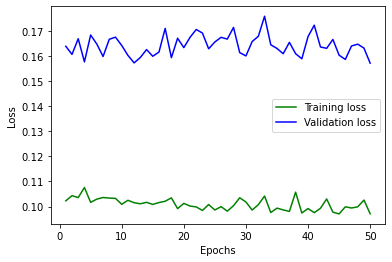

In [32]:
loss_train=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(1,51)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.plot()

In [38]:
X_test.shape

(328, 167)

In [36]:
X_train_reshape=np.reshape(X_train, (-1,1308, 167))
X_train_reshape.shape

(1, 1308, 167)

In [39]:
X_test_reshape=np.reshape(X_test, (-1,328, 167))
X_test_reshape.shape

(1, 328, 167)

In [42]:
y_train_reshape=np.reshape(y_train, (1,-1))
y_train_reshape.shape

(1, 1308)

In [43]:
y_test_reshape=np.reshape(y_test, (1, -1))
y_test_reshape.shape

(1, 328)

In [51]:
X.shape[1:]

(167,)

In [33]:
X_train.shape

(1308, 167)

In [31]:
model1=Sequential()

In [61]:
X_train.shape[1], X_train.shape[-1]

(167, 167)

In [77]:
model1 = Sequential()
model1.add(LSTM(64,return_sequences=True, input_shape=(1308,167)))
model1.add(Dropout(0.5))
model1.add(LSTM(20,return_sequences=False))
model1.add(Dropout(0.5))
model1.add(Dense(1))
model1.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'acc'])

In [74]:
model1=Sequential()
model1.add(LSTM(1308, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[-1])))
model1.add(Dense(64))
model1.add(Dense(1, activation='linear'))

model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 167, 1308)         7722432   
                                                                 
 dense_39 (Dense)            (None, 167, 64)           83776     
                                                                 
 dense_40 (Dense)            (None, 167, 1)            65        
                                                                 
Total params: 7,806,273
Trainable params: 7,806,273
Non-trainable params: 0
_________________________________________________________________


In [75]:
model1.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'acc'])

In [82]:
history1=model1.fit(X_train_reshape, y_train_reshape, epochs=30, verbose=1)

Epoch 1/30
1/1 [==============================] - 1s 802ms/step - loss: 0.2926 - mse: 0.2926 - mae: 0.5003 - acc: 0.4992
Epoch 2/30
1/1 [==============================] - 1s 894ms/step - loss: 0.2606 - mse: 0.2606 - mae: 0.5002 - acc: 0.4992
Epoch 3/30
1/1 [==============================] - 1s 856ms/step - loss: 0.2644 - mse: 0.2644 - mae: 0.5002 - acc: 0.4992
Epoch 4/30
1/1 [==============================] - 1s 770ms/step - loss: 0.2562 - mse: 0.2562 - mae: 0.5001 - acc: 0.4992
Epoch 5/30
1/1 [==============================] - 1s 810ms/step - loss: 0.4794 - mse: 0.4794 - mae: 0.4993 - acc: 0.5008
Epoch 6/30
1/1 [==============================] - 1s 788ms/step - loss: 0.2584 - mse: 0.2584 - mae: 0.5001 - acc: 0.4992
Epoch 7/30
1/1 [==============================] - 1s 808ms/step - loss: 0.3445 - mse: 0.3445 - mae: 0.5005 - acc: 0.4992
Epoch 8/30
1/1 [==============================] - 1s 782ms/step - loss: 0.4410 - mse: 0.4410 - mae: 0.4993 - acc: 0.5008
Epoch 9/30
1/1 [================

In [67]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 167, 64)           59392     
                                                                 
 dropout_5 (Dropout)         (None, 167, 64)           0         
                                                                 
 lstm_19 (LSTM)              (None, 20)                6800      
                                                                 
 dropout_6 (Dropout)         (None, 20)                0         
                                                                 
 dense_36 (Dense)            (None, 1)                 21        
                                                                 
Total params: 66,213
Trainable params: 66,213
Non-trainable params: 0
_________________________________________________________________


In [11]:
cv=StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

In [12]:
avg=0

for train_index, test_index in cv.split(X, y):
    X_train, X_test= X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svc.fit(X_train, y_train)
    pred=svc.predict(X_test)
    acc=accuracy_score(y_test, pred)
    avg=avg+acc
    print(svc.score(X_train, y_train))
    
    print(acc)
    print(confusion_matrix(y_test, pred))
print("Average score is ", (avg/15))

0.918086500655308
0.9
[[53  2]
 [ 9 46]]
0.9233791748526523
0.908256880733945
[[50  5]
 [ 5 49]]
0.9246889325474787
0.8623853211009175
[[51  4]
 [11 43]]
0.9220694171578258
0.8807339449541285
[[48  7]
 [ 6 48]]
0.9266535690897184
0.8348623853211009
[[48  7]
 [11 43]]
0.9233791748526523
0.8623853211009175
[[49  6]
 [ 9 45]]
0.9194499017681729
0.8899082568807339
[[49  6]
 [ 6 48]]
0.9214145383104125
0.8715596330275229
[[48  7]
 [ 7 47]]
0.9207596594629993
0.8440366972477065
[[47  7]
 [10 45]]
0.9207596594629993
0.8440366972477065
[[42 12]
 [ 5 50]]
0.9201047806155861
0.8623853211009175
[[49  5]
 [10 45]]
0.9194499017681729
0.8899082568807339
[[49  5]
 [ 7 48]]
0.9207596594629993
0.926605504587156
[[49  5]
 [ 3 52]]
0.922724296005239
0.8715596330275229
[[49  5]
 [ 9 46]]
0.922724296005239
0.8348623853211009
[[46  8]
 [10 45]]
Average score is  0.8722324159021407


In [13]:
test_smiles2=['NC1NCC2(C3C(=CN=C(C=3)N3COCCC3)OC3C2=CC(=CC=3)C2C=C(C#N)C=CC=2)O1',
    'COC1C=C(C2C=C([C@@]3(C(=O)N(C)C(N)=N3)C3C(F)=CC=C(C#N)C=3)C=CC=2)N=C1',
    'CC1C(C(NC2C=C([C@]3(N=C(N)[C@@](C(F)(F)F)C3)C)C(F)=C(F)C=2)=O)=NC=C(F)C=1',
    'CC[C@]1(C(C)(C)COC(N)=N1)C1C(=O)C(C)=CC=C(NC(C2N=CC(C#N)=CC=2)=O)C=1',
    'C[C@]1(C(F)(F)COC(N)=N1)C1C(F)=C(F)OC=C(NC(C2N=CC(C(F)(F)F)=CC=2)=O)C=1',
    'C[C@@]1(N=C(N)SC[C@H](C(F)(F)F)C1)C1C(F)=C(F)C=C(NC(C2C(Cl)=CC(F)=CN=2)=O)C=1',
    'CCOCc1ccc2cc(-c3ccccc3)c(-c3ccc(C4(N)CCC4)cc3)nc2c1F',
    'CCOC(=O)c1ccc2nc(-c3ccc(C4(N)CCC4)cc3)c(-c3ccccc3)c21',
    'N[C@H]1Sc2ncc(-c3ccccc3)c(-c3ccc(C4(N)CCC4)cc3)cn2n1C',
    'NS(=O)(=O)c1nc2nc(-c3ccc(C4(N)CCC4)cc3)c(-c3ccccc3)cc1N2',
    'N[C@H](O)c1sc(C(C)=O)c2ncc(-c3ccccc3)c(-c3ccccc3)c12',
    'NS(=O)(=O)c1nn2c(-c3ccccc3)c(-c3ccc(C4(N)CCC4)cc3)nc12',
    'Nc1ccc(F)cc1n1CCN(c2ncnc3[nH]ccc23)CC1',
    'CNC1COC(=O)[C@H](CNCN3CC2(c3ccnc3[nH]ccc23)s1)c1c(C)noc1O',
    'Cc1ccccc2ncnc(N3CCC(N)(CO[C@H](O)Cc4ccc(Cl)cc4)CC3)c2c1',
    'Cnc1cc(C)c2nc(-c3ccc(C4(N)CCC4)cc3)c(-c3ccccc3)n2c1',
    'CN1Cc2cc(F)ccc2N1CC(=O)Cc1nc(N2CCOCC2)c(F)c(=O)n1C(=C)CCCCCNS(=O)(C)=O',
    'Nc1nc(N)n2nc(-c3ccccc3)c(-c3ccc(C4(N)CCC4)cc3)nc12',
    'NS(=O)(=O)[C@H]1CNC(=O)c2c(-c3ccccc3)c(-c3ccc(C4(N)CCC4)cc3)nc2c1-c1ccccc1C',
    'CNC1COC2=C(C(=O)N3CCOc3ccnc3[nH]ccc23)CC1C',
    'Cc1cc(-c2ocnc2C)Cc1',
    'NS(=O)(=O)[C@H](CN)C(=O)c1c[nH]c(c1)C(C)(C)C(=O)N1CCN(c2ncnc3[nH]nc(C)c23)C1',
    'CCc1cc2ccc3c(N)nc4nc(Nc(COC[C@@H]5OCCC5)c4n3)cc12',
    'Coc1c(C)cc(OCC(C)C)c2c(c2nc3[nH]cnc3cc1)c1ccc2ccccc2c1',
    'CN1CCC2[C@H](C(=O)N3CCOc4ccccc4c3=O)[C@@H]2Oc1',
    'Nc1c(O)ccnc2[nH]c(-c3ccc(C4(N)CCC4)cc3)c(-c3ccc(C4(N)CCC4)cc3)nc21', 
    'N#Cc1c(N)ncnc1N1CCC(C(F)(F)CN2)c1COC2',  
    'Cnc1ccc2cncc(Nc3Cc2c(N)ncnc23)c21',
    'Cc1c(F)ccc(Cl)c1C1CCN(Cc2ccc(-c3nnc4n3-c3cccnc3Nc3ccccc3-4)cc2)CC1',
    'Cn1ncc(Cl)c1-c1[nH]c(C2=C(N)CCC2(F)F)cc1N1CCC(c2nc(-c3cccc(F)c3)c(-c3ccccn3)CC2)C1',
    'Nc1nccc(-c2ccc3nc(-c4ccccc4)c(-c4ccc(C5(N)CCC5)cc4)nc3c2)n1',
    'NC1(c2ccc(-c3nc4ccc(C#N)cnn43)c(-c3ccccc3)c2)CCCC1',
    'CS(=O)(=O)OCC(C(COS(=O)(=O)C)O)O']

In [14]:
error=[]
target=[]
for smile in test_smiles2:
    try:
        c=Chem.MolFromSmiles(smile)
        fp=AllChem.GetMACCSKeysFingerprint(c)
        fp=fp.ToBitString()
        target.append(fp)
    except:
        error.append(smile)

[15:58:18] non-ring atom 1 marked aromatic
[15:58:19] non-ring atom 1 marked aromatic
[15:58:19] non-ring atom 1 marked aromatic


In [15]:
test_result=[x for x in test_smiles2 if x not in error]
test_result

['NC1NCC2(C3C(=CN=C(C=3)N3COCCC3)OC3C2=CC(=CC=3)C2C=C(C#N)C=CC=2)O1',
 'COC1C=C(C2C=C([C@@]3(C(=O)N(C)C(N)=N3)C3C(F)=CC=C(C#N)C=3)C=CC=2)N=C1',
 'CC1C(C(NC2C=C([C@]3(N=C(N)[C@@](C(F)(F)F)C3)C)C(F)=C(F)C=2)=O)=NC=C(F)C=1',
 'CC[C@]1(C(C)(C)COC(N)=N1)C1C(=O)C(C)=CC=C(NC(C2N=CC(C#N)=CC=2)=O)C=1',
 'C[C@]1(C(F)(F)COC(N)=N1)C1C(F)=C(F)OC=C(NC(C2N=CC(C(F)(F)F)=CC=2)=O)C=1',
 'C[C@@]1(N=C(N)SC[C@H](C(F)(F)F)C1)C1C(F)=C(F)C=C(NC(C2C(Cl)=CC(F)=CN=2)=O)C=1',
 'CCOCc1ccc2cc(-c3ccccc3)c(-c3ccc(C4(N)CCC4)cc3)nc2c1F',
 'CCOC(=O)c1ccc2nc(-c3ccc(C4(N)CCC4)cc3)c(-c3ccccc3)c21',
 'N[C@H]1Sc2ncc(-c3ccccc3)c(-c3ccc(C4(N)CCC4)cc3)cn2n1C',
 'NS(=O)(=O)c1nc2nc(-c3ccc(C4(N)CCC4)cc3)c(-c3ccccc3)cc1N2',
 'N[C@H](O)c1sc(C(C)=O)c2ncc(-c3ccccc3)c(-c3ccccc3)c12',
 'NS(=O)(=O)c1nn2c(-c3ccccc3)c(-c3ccc(C4(N)CCC4)cc3)nc12',
 'Nc1ccc(F)cc1n1CCN(c2ncnc3[nH]ccc23)CC1',
 'CNC1COC(=O)[C@H](CNCN3CC2(c3ccnc3[nH]ccc23)s1)c1c(C)noc1O',
 'Cc1ccccc2ncnc(N3CCC(N)(CO[C@H](O)Cc4ccc(Cl)cc4)CC3)c2c1',
 'CN1Cc2cc(F)ccc2N1CC(=O)Cc1nc(N

In [16]:
test_desc=np.asarray(MACCS(test_result))

C:\Users\OM\anaconda3\envs\rdkit\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if sys.path[0] == '':


In [17]:
svc.predict(test_desc)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [33]:
test_smiles=['C1=NC2=C(N1)C(=S)N=CN2',
 'CC(C)C(=O)NC1=CC(=C(C=C1)[N+](=O)[O-])C(F)(F)F',
 'CCC(=O)N(C1CCN(CC1)CCC2=CC=CC=C2)C3=CC=CC=C3',
 'C(CCl)NC(=O)N(CCCl)N=O',
 'CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C(=O)N[C@@H](CCC(=O)O)C(=O)O',
 'C1=CC=C(C(=C1)C(C2=CC=C(C=C2)Cl)C(Cl)Cl)Cl',
 'C1=C(C(=O)NC(=O)N1)F',
 'COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C)OCCOC']

In [23]:
def classification(X, y):
    models=[LGBMClassifier, RandomForestClassifier, XGBClassifier, SVC, ExtraTreesClassifier]
    for model in models:
        p=model()
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        p.fit(X_train, y_train)
        pred=p.predict(X_test)
        print("For model ", p)
        print(accuracy_score(y_test,pred))
        
        print(classification_report(y_test, pred))
        
        
        print("Model score is ", p.score(X_train, y_train))
        print("-------------------------------------------------")

In [34]:
test_desc=np.asarray(MACCS(test_smiles))

C:\Users\OM\anaconda3\envs\rdkit\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if sys.path[0] == '':


In [35]:
def cvfold(X, y, n, model):
    avg=0
    p=model()
    cv=StratifiedKFold(n_splits=n, shuffle=True, random_state=42)
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        
        y_train, y_test = y[train_index], y[test_index]
        
        p.fit(X_train, y_train)
        
        pred=p.predict(X_test)
        
        acc=accuracy_score(y_test, pred)
        
        print("Accuracy is ", acc)
        
        avg=avg+acc
        
        print(classification_report(y_test, pred))
        
        print("Model score is ", p.score(X_train, y_train))
        
    print(p.predict(test_desc))
    
    print("-----------------------------------------------")
    
    print(p.predict(test_desc2))
        
    print("Average accuracy is ", (avg/n))

In [24]:
classification(X, y)

For model  LGBMClassifier()
0.863080684596577
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       202
           1       0.88      0.85      0.86       207

    accuracy                           0.86       409
   macro avg       0.86      0.86      0.86       409
weighted avg       0.86      0.86      0.86       409

Model score is  0.9918500407497962
-------------------------------------------------
For model  RandomForestClassifier()
0.882640586797066
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       206
           1       0.89      0.87      0.88       203

    accuracy                           0.88       409
   macro avg       0.88      0.88      0.88       409
weighted avg       0.88      0.88      0.88       409

Model score is  0.9967400162999185
-------------------------------------------------
For model  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
 

In [39]:
Counter(df['OUTCOME']), Counter(y_new)

(Counter({0: 6583, 1: 818}), Counter({0: 818, 1: 818}))

In [41]:
test_smiles2=['NC1NCC2(C3C(=CN=C(C=3)N3COCCC3)OC3C2=CC(=CC=3)C2C=C(C#N)C=CC=2)O1',
    'COC1C=C(C2C=C([C@@]3(C(=O)N(C)C(N)=N3)C3C(F)=CC=C(C#N)C=3)C=CC=2)N=C1',
    'CC1C(C(NC2C=C([C@]3(N=C(N)[C@@](C(F)(F)F)C3)C)C(F)=C(F)C=2)=O)=NC=C(F)C=1',
    'CC[C@]1(C(C)(C)COC(N)=N1)C1C(=O)C(C)=CC=C(NC(C2N=CC(C#N)=CC=2)=O)C=1',
    'C[C@]1(C(F)(F)COC(N)=N1)C1C(F)=C(F)OC=C(NC(C2N=CC(C(F)(F)F)=CC=2)=O)C=1',
    'C[C@@]1(N=C(N)SC[C@H](C(F)(F)F)C1)C1C(F)=C(F)C=C(NC(C2C(Cl)=CC(F)=CN=2)=O)C=1',
    'CCOCc1ccc2cc(-c3ccccc3)c(-c3ccc(C4(N)CCC4)cc3)nc2c1F',
    'CCOC(=O)c1ccc2nc(-c3ccc(C4(N)CCC4)cc3)c(-c3ccccc3)c21',
    'N[C@H]1Sc2ncc(-c3ccccc3)c(-c3ccc(C4(N)CCC4)cc3)cn2n1C',
    'NS(=O)(=O)c1nc2nc(-c3ccc(C4(N)CCC4)cc3)c(-c3ccccc3)cc1N2',
    'N[C@H](O)c1sc(C(C)=O)c2ncc(-c3ccccc3)c(-c3ccccc3)c12',
    'NS(=O)(=O)c1nn2c(-c3ccccc3)c(-c3ccc(C4(N)CCC4)cc3)nc12',
    'Nc1ccc(F)cc1n1CCN(c2ncnc3[nH]ccc23)CC1',
    'CNC1COC(=O)[C@H](CNCN3CC2(c3ccnc3[nH]ccc23)s1)c1c(C)noc1O',
    'Cc1ccccc2ncnc(N3CCC(N)(CO[C@H](O)Cc4ccc(Cl)cc4)CC3)c2c1',
    'Cnc1cc(C)c2nc(-c3ccc(C4(N)CCC4)cc3)c(-c3ccccc3)n2c1',
    'CN1Cc2cc(F)ccc2N1CC(=O)Cc1nc(N2CCOCC2)c(F)c(=O)n1C(=C)CCCCCNS(=O)(C)=O',
    'Nc1nc(N)n2nc(-c3ccccc3)c(-c3ccc(C4(N)CCC4)cc3)nc12',
    'NS(=O)(=O)[C@H]1CNC(=O)c2c(-c3ccccc3)c(-c3ccc(C4(N)CCC4)cc3)nc2c1-c1ccccc1C',
    'CNC1COC2=C(C(=O)N3CCOc3ccnc3[nH]ccc23)CC1C',
    'Cc1cc(-c2ocnc2C)Cc1',
    'NS(=O)(=O)[C@H](CN)C(=O)c1c[nH]c(c1)C(C)(C)C(=O)N1CCN(c2ncnc3[nH]nc(C)c23)C1',
    'CCc1cc2ccc3c(N)nc4nc(Nc(COC[C@@H]5OCCC5)c4n3)cc12',
    'Coc1c(C)cc(OCC(C)C)c2c(c2nc3[nH]cnc3cc1)c1ccc2ccccc2c1',
    'CN1CCC2[C@H](C(=O)N3CCOc4ccccc4c3=O)[C@@H]2Oc1',
    'Nc1c(O)ccnc2[nH]c(-c3ccc(C4(N)CCC4)cc3)c(-c3ccc(C4(N)CCC4)cc3)nc21', 
    'N#Cc1c(N)ncnc1N1CCC(C(F)(F)CN2)c1COC2',  
    'Cnc1ccc2cncc(Nc3Cc2c(N)ncnc23)c21',
    'Cc1c(F)ccc(Cl)c1C1CCN(Cc2ccc(-c3nnc4n3-c3cccnc3Nc3ccccc3-4)cc2)CC1',
    'Cn1ncc(Cl)c1-c1[nH]c(C2=C(N)CCC2(F)F)cc1N1CCC(c2nc(-c3cccc(F)c3)c(-c3ccccn3)CC2)C1',
    'Nc1nccc(-c2ccc3nc(-c4ccccc4)c(-c4ccc(C5(N)CCC5)cc4)nc3c2)n1',
    'NC1(c2ccc(-c3nc4ccc(C#N)cnn43)c(-c3ccccc3)c2)CCCC1',
    'CS(=O)(=O)OCC(C(COS(=O)(=O)C)O)O'] #Treosulfan

In [42]:
error=[]
target=[]
for smile in test_smiles2:
    try:
        c=Chem.MolFromSmiles(smile)
        fp=AllChem.GetMACCSKeysFingerprint(c)
        fp=fp.ToBitString()
        target.append(fp)
    except:
        error.append(smile)

[16:30:31] non-ring atom 1 marked aromatic
[16:30:31] non-ring atom 1 marked aromatic
[16:30:31] non-ring atom 1 marked aromatic


In [43]:
len(test_smiles2), len(target)

(33, 30)

In [44]:
error

['Cnc1cc(C)c2nc(-c3ccc(C4(N)CCC4)cc3)c(-c3ccccc3)n2c1',
 'Coc1c(C)cc(OCC(C)C)c2c(c2nc3[nH]cnc3cc1)c1ccc2ccccc2c1',
 'Cnc1ccc2cncc(Nc3Cc2c(N)ncnc23)c21']

In [45]:
test_result=[x for x in test_smiles2 if x not in error]
test_result

['NC1NCC2(C3C(=CN=C(C=3)N3COCCC3)OC3C2=CC(=CC=3)C2C=C(C#N)C=CC=2)O1',
 'COC1C=C(C2C=C([C@@]3(C(=O)N(C)C(N)=N3)C3C(F)=CC=C(C#N)C=3)C=CC=2)N=C1',
 'CC1C(C(NC2C=C([C@]3(N=C(N)[C@@](C(F)(F)F)C3)C)C(F)=C(F)C=2)=O)=NC=C(F)C=1',
 'CC[C@]1(C(C)(C)COC(N)=N1)C1C(=O)C(C)=CC=C(NC(C2N=CC(C#N)=CC=2)=O)C=1',
 'C[C@]1(C(F)(F)COC(N)=N1)C1C(F)=C(F)OC=C(NC(C2N=CC(C(F)(F)F)=CC=2)=O)C=1',
 'C[C@@]1(N=C(N)SC[C@H](C(F)(F)F)C1)C1C(F)=C(F)C=C(NC(C2C(Cl)=CC(F)=CN=2)=O)C=1',
 'CCOCc1ccc2cc(-c3ccccc3)c(-c3ccc(C4(N)CCC4)cc3)nc2c1F',
 'CCOC(=O)c1ccc2nc(-c3ccc(C4(N)CCC4)cc3)c(-c3ccccc3)c21',
 'N[C@H]1Sc2ncc(-c3ccccc3)c(-c3ccc(C4(N)CCC4)cc3)cn2n1C',
 'NS(=O)(=O)c1nc2nc(-c3ccc(C4(N)CCC4)cc3)c(-c3ccccc3)cc1N2',
 'N[C@H](O)c1sc(C(C)=O)c2ncc(-c3ccccc3)c(-c3ccccc3)c12',
 'NS(=O)(=O)c1nn2c(-c3ccccc3)c(-c3ccc(C4(N)CCC4)cc3)nc12',
 'Nc1ccc(F)cc1n1CCN(c2ncnc3[nH]ccc23)CC1',
 'CNC1COC(=O)[C@H](CNCN3CC2(c3ccnc3[nH]ccc23)s1)c1c(C)noc1O',
 'Cc1ccccc2ncnc(N3CCC(N)(CO[C@H](O)Cc4ccc(Cl)cc4)CC3)c2c1',
 'CN1Cc2cc(F)ccc2N1CC(=O)Cc1nc(N

In [46]:
test_desc2=np.asarray(MACCS(test_result))

C:\Users\OM\anaconda3\envs\rdkit\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if sys.path[0] == '':


In [47]:
#For API
svc.predict(test_desc2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [48]:
svc.predict(test_desc)

array([0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [49]:
test_smiles

['C1=NC2=C(N1)C(=S)N=CN2',
 'CC(C)C(=O)NC1=CC(=C(C=C1)[N+](=O)[O-])C(F)(F)F',
 'CCC(=O)N(C1CCN(CC1)CCC2=CC=CC=C2)C3=CC=CC=C3',
 'C(CCl)NC(=O)N(CCCl)N=O',
 'CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C(=O)N[C@@H](CCC(=O)O)C(=O)O',
 'C1=CC=C(C(=C1)C(C2=CC=C(C=C2)Cl)C(Cl)Cl)Cl',
 'C1=C(C(=O)NC(=O)N1)F',
 'COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C)OCCOC']

In [58]:
test_smiles3=['COC1=C2C3=C(C(=O)CC3)C(=O)OC2=C4C(=C1)OC5C4(C=CO5)O',
             'C1=CC=C(C=C1)C2=CC=C(C=C2)N',
             'COC1=CC=CC2=C3C(=C(C=C21)[N+](=O)[O-])C(=CC4=C3OCO4)C(=O)O.COC1=CC=CC2=C3C(=C(C=C21)[N+](=O)[O-])C(=CC4=C3OCO4)C(=O)O.C1OC2=C(O1)C3=C(C(=C2)C(=O)O)C(=CC4=CC=CC=C43)[N+](=O)[O-]',
             'CN1C=NC(=C1SC2=NC=NC3=C2NC=N3)[N+](=O)[O-]',
              'CS(=O)(=O)OCCCCOS(=O)(=O)C'
              'C1=CC(=CC=C1CCCC(=O)O)N(CCCl)CCCl',
              'CC(CCl)Cl'
             ]

In [59]:
test_desc3=np.asarray(MACCS(test_smiles3))

C:\Users\OM\anaconda3\envs\rdkit\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if sys.path[0] == '':


In [60]:
svc.predict(test_desc3)

array([0, 1, 1, 1, 1, 1], dtype=int64)

In [53]:
svc1=SVC(C=2.0)

In [55]:
cv1=StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

In [56]:
avg1=0

for train_index, test_index in cv1.split(X, y):
    X_train, X_test= X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svc1.fit(X_train, y_train)
    pred=svc1.predict(X_test)
    acc1=accuracy_score(y_test, pred)
    avg1=avg1+acc1
    print(svc1.score(X_train, y_train))
    
    print(acc1)
    print(confusion_matrix(y_test, pred))
print("Average score is ", (avg1/15))

0.9475753604193972
0.9181818181818182
[[53  2]
 [ 7 48]]
0.9482645710543549
0.926605504587156
[[50  5]
 [ 3 51]]
0.9508840864440079
0.8715596330275229
[[51  4]
 [10 44]]
0.9515389652914211
0.8807339449541285
[[48  7]
 [ 6 48]]
0.9528487229862476
0.8256880733944955
[[47  8]
 [11 43]]
0.9495743287491814
0.8715596330275229
[[49  6]
 [ 8 46]]
0.9521938441388343
0.908256880733945
[[51  4]
 [ 6 48]]
0.9508840864440079
0.8807339449541285
[[48  7]
 [ 6 48]]
0.9515389652914211
0.8440366972477065
[[45  9]
 [ 8 47]]
0.9502292075965947
0.8623853211009175
[[44 10]
 [ 5 50]]
0.9495743287491814
0.8807339449541285
[[50  4]
 [ 9 46]]
0.9482645710543549
0.8990825688073395
[[50  4]
 [ 7 48]]
0.9528487229862476
0.9174311926605505
[[48  6]
 [ 3 52]]
0.9502292075965947
0.8807339449541285
[[48  6]
 [ 7 48]]
0.9521938441388343
0.8532110091743119
[[46  8]
 [ 8 47]]
Average score is  0.8813956074506535


In [57]:
svc1.predict(test_desc3)

array([1, 1, 0, 1], dtype=int64)

In [2]:
import numpy as np

In [3]:
np.__version__

'1.21.6'